# 9. Gyakorlat - Rezgésgerjesztő
2021.04.04.

## Feladat:

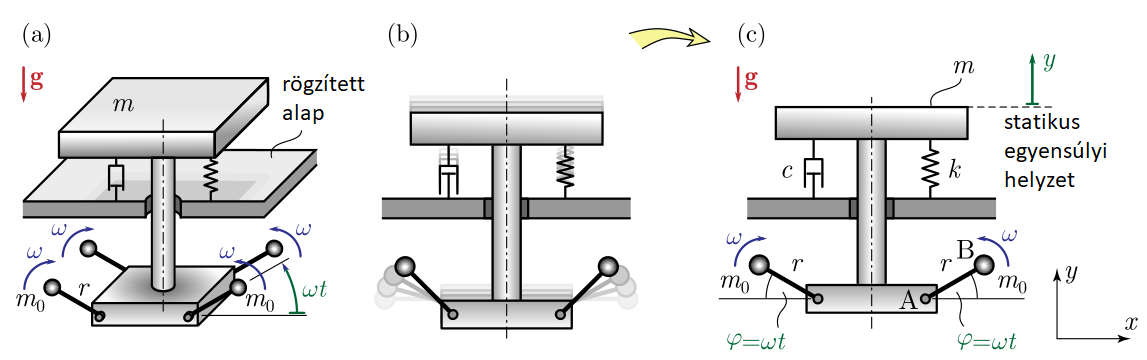

In [1]:
from IPython.display import Image
Image(filename='gyak9_1.png',width=1000)

A mellékelt ábrán egy gerjesztő látható, ami egy $m$ tömegű merev testből, és 4 $\omega$ szögsebességgel szimmetrikusan forgó $r$ excentricitású $m_0$ tömegből áll. Az egyszerűsített mechanikai modellben a mozgó merev test egy $k$ merevségű rugó és egy $c$ csillapítási tényezőjű csillapító elmmel van az alaphoz rögzítve. A mozgás leírásáshoz az $y(t)$ általános koordinátát használjuk, melyet a statikus egyensúlyi ponttól mérünk. Az egyensúlyi pontban ($y=0$) a rugó előterhelt állapotban van, ami a gravitációs erővel ellentétes irányú erőt eredményez.

### Adatok:
|||
|-------------------------------------|-------------------------------------|
| $m$ = 60 kg                         | $\omega$ = 75 rad/s                 |
| $m_0$ = 0.5 kg                      | $k$ = 25000 N/m                     |
| $r$ = 0,1 m                         |

### Részfeladatok:

1. Határozza meg a csillapítási tényezőt $c$, ha a relatív csillapítási tényező $\zeta = 0.05$!
2. Határozza meg az állandósult állapotban $y_p(t)$  a rezgés amplitúdóját $Y$!
3. Mekkora az alapra ható erő $F_{a,max}$ legnagyobb értéke az állandósult állapotban?

## Megoldás:

## 1. Feladat:
A mozgásegyenletet a Lagrange-egyenlet segítségével határozzuk meg. Mivel a rendszerre nem hat semmilyen külső erő ezért az álatlános erő $Q^\star=0$. A Lagrange-egyenlet tehát az $y$ általános koordináta segítségével az alábbi alakban írható

$$\frac{\mathrm d}{\mathrm dt}\frac{\partial T}{\partial \dot y}-\frac{\partial T}{\partial y} + \frac{\partial \mathcal D}{\partial \dot y} + \frac{\partial U}{\partial y} = 0,$$

ahol $T$ a kinetikus energia, $\mathcal D$ a Rayleigh-féle disszipatív potenciál, $U$ a potenciálfüggvény.

In [2]:
import sympy as sp
from IPython.display import display, Math

sp.init_printing()

In [3]:
## Függvények, szimbólumok definiálása

m, m0, r, ω, k, ζ, c, g = sp.symbols("m, m0, r, ω, k, ζ, c, g", real=True)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben
adatok = [(m, 60), (m0, 0.5), (r, 0.1), (ω, 75), (k, 25000), (ζ, 0.05), (g,9.81)]

# általános koordináta
t = sp.symbols("t",real=True, positive=True)
y = sp.Function('y')(t)

In [4]:
## A kinetikus energia

"""(Így is lehet több soros kommentet írni!)
A kinetikus energia felírásakor a merev test függőleges mozgását
és a négy tömegpont excentrikus forgását kell figyelembe venni.
Mivel a Lagrange-egyenletben az általános koordináta szerinti derivált szerepel,
ezért az excentrikus forgásból adódó v0 sebességet is az 
y általános koordináta segítségével kell kifejezni."""

# Ehhez előszőr írjuk fel a tömegpont helyzetét leíró r0 vektort
C1, C2 = sp.symbols("C1, C2")
r0 = sp.Matrix([[r*sp.cos(ω*t)+C1],[y+r*sp.sin(ω*t)+C2]])

# Ebből deriválás segítségével kapható a sebességvektor
v0 = r0.diff(t)

T = (sp.Rational(1,2)*m*y.diff(t)**2+4*sp.Rational(1,2)*m0*v0.dot(v0)).trigsimp()

display(Math('T = {}'.format(sp.latex(T))))

<IPython.core.display.Math object>

In [5]:
## A Rayleigh féle disszipatív potenciál

# A csillapító elemre az alábbi disszipatív potenciál írható fel
D = sp.Rational(1,2)*c*y.diff(t,2)

display(Math('\mathcal{{D}} = {}'.format(sp.latex(D))))

<IPython.core.display.Math object>

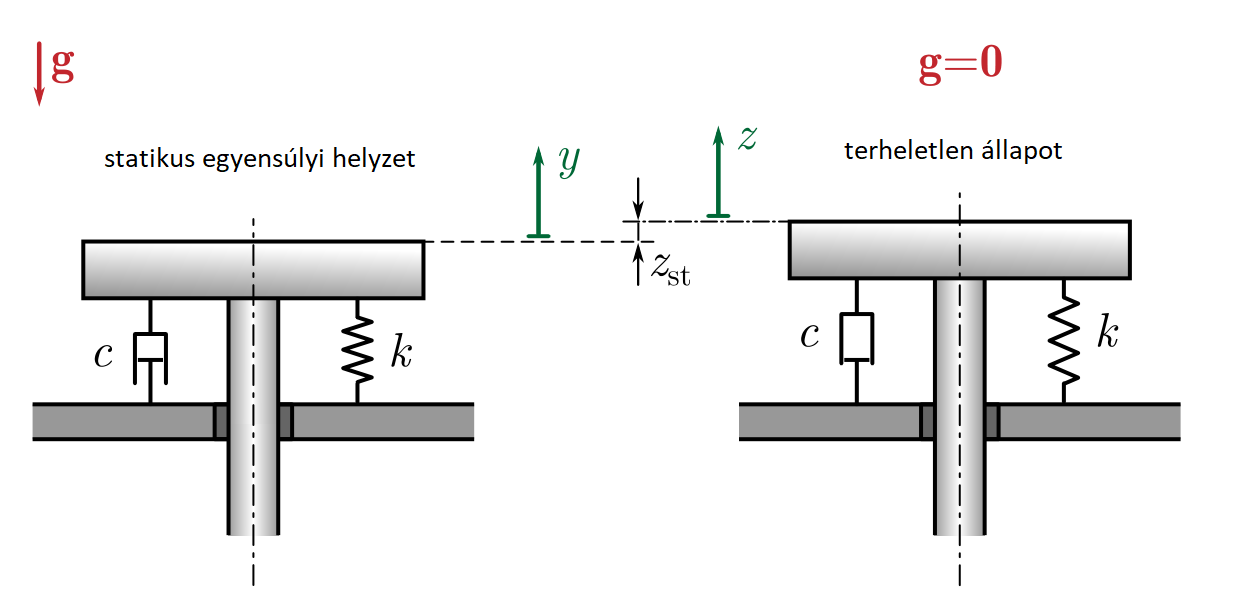

In [6]:
from IPython.display import Image
Image(filename='gyak9_2.png',width=800)

In [7]:
## A potenciális energia

"""A potenciális energia a rugókban felhalmozódó potenciális energia
és a gravitációs erő potenciális energiájából tevődik össze.
Mivel a rugó előterhelt állapotban van az egyensúlyi pozícióban, ezért
célszerű a potenciális energiának bevezetni egy új koordináta rendszert,
aminek a függőleges nullpontja ott van, ahol a rugó hossza megegyegyzik
a terheletlen hosszával (lásd fenti ábra). Ezzel a transzformációval 
az új koordináta rendszerben a nullszint-től való eltérést a z koordináta méri"""
z_st, C0 = sp.symbols("z_st, C0")
z = y-z_st
# Az új koordinátával a potenciális energia az alábbi alakban írható
U = sp.Rational(1,2)*k*z**2+m*g*z+4*m0*g*(z+r*sp.sin(ω*t))+C0 # (C0 tetszőleges konstans, a deriválsá után ki fog esni)

display(Math('U = {}'.format(sp.latex(U))))

<IPython.core.display.Math object>

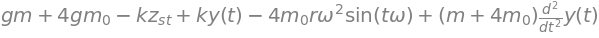

In [8]:
## A mozgásegyenlet

mozgegy_0 = ((T.diff(y.diff(t))).diff(t)-T.diff(y)+D.diff(y.diff(t))+U.diff(y)).expand().collect(y)

display(mozgegy_0)

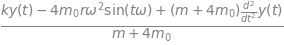

In [9]:
"""A mozgásegyenletben az időfüggetlen tag az egyensúlyi egyenletet adja vissza.
Mivel az egyensúlyban a rugóerő és a gravitációs
erő kiegyenlítik egymást ezért ez a tag nullával egyenlő,
tehát elhagyható a mozgásegyeneletből"""

mozgegy_1 = mozgegy_0.subs(g*m+4*g*m0-k*z_st, 0)

# Osszunk le a főegyütthatóval, hogy a megszokott alkra jussunk
foegy = mozgegy_1.coeff(y.diff(t,2))
mozgegy = (mozgegy_1/foegy)

display(mozgegy)

In [10]:
## A csillapítási tényező, a körfrekvenciák, és a statikus kitérés számolása:

# csillapítatlan sajátkörfrekvencia
y_coeff = mozgegy.expand().coeff(y)
ω_n = sp.sqrt(y_coeff)

# csillapítási tényező
c = (2*ζ*ω_n)*(m+4*m0)

# statikus deformáció (inhomogenitást okozó tagban a szögfüggvény együtthatójából kapható)
inhom_coeff = -(mozgegy.expand().coeff(y,0)).coeff(sp.sin(ω*t))
f_0 = inhom_coeff/ω_n**2

## numerikusan
ω_n_num = ω_n.subs(adatok).evalf(4)
c_num = c.subs(adatok).evalf(4)
f_0_num = f_0.subs(adatok).evalf(6)

display(Math('ω_n= {}'.format(sp.latex(ω_n_num))))
display(Math('c = {}'.format(sp.latex(c_num))))
display(Math('f_0 = {}'.format(sp.latex(f_0_num))))

# [rad/s]
# [Ns/m]
# [m]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2. Feladat:
A partikuláris megoldást a legegyszerűbb alakra rendezve a kifejezésben megjelenik a rezgésamplitúdó $Y$

$$y_p(t) = Y\sin(\omega t-\vartheta),$$

ahol $\vartheta$ a fázisszög. A rezgésamplitúdó a nagyítás segítségével számítható

$$Y = Nf_0,$$

ahol a nagyítás a következő alakban kapható

$$N = \frac{1}{\sqrt{(1-\lambda^2)^2+4\zeta^2\lambda^2}}.$$

In [11]:
## rezgésamplitúdó meghatározása

# frekvencia hányados
λ = (ω/ω_n)
λ_num = λ.subs(adatok).evalf(5)
display(Math('λ = {}'.format(sp.latex(λ_num))))

# nagyítás
N = 1/(sp.sqrt((1-λ**2)**2+4*ζ**2*λ**2))
N_num = N.subs(adatok).evalf(4)
display(Math('N = {}'.format(sp.latex(N_num))))

# rezgésamplitúdó
Y = N*f_0
Y_num = Y.subs(adatok).evalf(3)
display(Math('Y = {}'.format(sp.latex(Y_num))))

# fázisszög
ϑ =  sp.atan2(2*ζ*λ,(1-λ**2))
ϑ_num = (ϑ).subs(adatok).evalf(5)
display(Math('ϑ = {}'.format(sp.latex(ϑ_num))))

# partikuláris megoldás
y_p = Y*sp.sin(ω*t-ϑ)
y_p_num = Y_num*sp.sin(ω.subs(adatok)*t-ϑ_num)
display(Math('y_p(t) = {}'.format(sp.latex(y_p_num))))

# [1]
# [1]
# [m]
# [rad]
# [m]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 3. Feladat

In [12]:
## Az alapra átadódó erő egy statikus (rugó) és egy dinamikus (rugó + csillapítás) tagból adódik össze

# A statikus tag a gravitációs erővel egyezik meg
F_st = g*(m+4*m0)
F_st_num = F_st.subs(adatok)
display(Math('F_st = {}'.format(sp.latex(F_st_num))))

# [N]

<IPython.core.display.Math object>

Az átadódó erő dinamikus része felírható a partikuláris megoldáshoz hasonlóan egy egyszerűsített alakban 

$$F_{din} = F_A\cos(\omega t +\delta),$$

ahol $F_A$ az átadódó erő amplitúdója. A trigonometrikus azonosságokat kihasználva ez az erőamplitúdó könnyen meghatározható ha felírjuk a dinamikus erőt a rugóerővel és a csillapító erővel kifejezve

\begin{split}
F_A\cos(\omega t +\delta) &= F_A\cos(\omega t) \cos\delta-F_A\sin(\omega t) \sin\delta=\\
&= kY\sin(\omega t)\cos\vartheta-kY\cos(\omega t)\sin\vartheta + cY\omega\cos(\omega t)\cos\vartheta-cY\omega\sin(\omega t)\sin\vartheta=\\
&=kY\sin(\omega t-\vartheta)+cY\omega\cos(\omega t-\vartheta)
\end{split}

Az egyenlet két oldalán szereplő együtthatóknak meg kell egyeznük, tehát erre a feltételre felírhatunk egy egyenletrendszert, amit megoldva adódik az átadódó erő amplitúdója $F_A$. Ez a megoldás pythonban kicsit nehézkes, sőt az sem biztos hogy a sympy solvere megtalálja az egyenletrendszer megoldását, ezért célszerű ezt numerikusan kiszámolni.

In [13]:
import numpy as np

# A rugóerő dinamikus része
F_r = k*y_p_num

# A csillapításból származó erő
F_c = c*y_p_num.diff(t)

# A dinamikus tag
F_din = F_r+F_c

### dinamikus erőtag értékeinek előállítása az idő függvényében
t_val = np.linspace(0,0.5,1000) # lista létrehozása a [0 ; 0,5] intervallum 1000 részre való bontásával 
F_din_val = np.zeros(len(t_val)) # nulla lista létrehozása (ugyanannyi elemszámmal)
# for ciklus segítségével írjuk felül a nulla listában szereplő elemeket az adott x értékhez tartozó y értékekkel
for i in range(len(t_val)):
    F_din_val[i] = F_din.subs(adatok).subs(t,t_val[i]).evalf()
    
# Erőmaximum megkeresése
F_din_max = np.around(max(F_din_val),decimals=2) # két tizedesre kerekítve
display(Math('F_{{din,max}} = {}'.format(sp.latex(F_din_max))))

# A dinamiks taghoz még hozzá kell adni a statikus tagot
F_A_max = F_din_max+F_st_num
display(Math('F_{{A,max}} = {}'.format(sp.latex(F_A_max))))

# [N]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

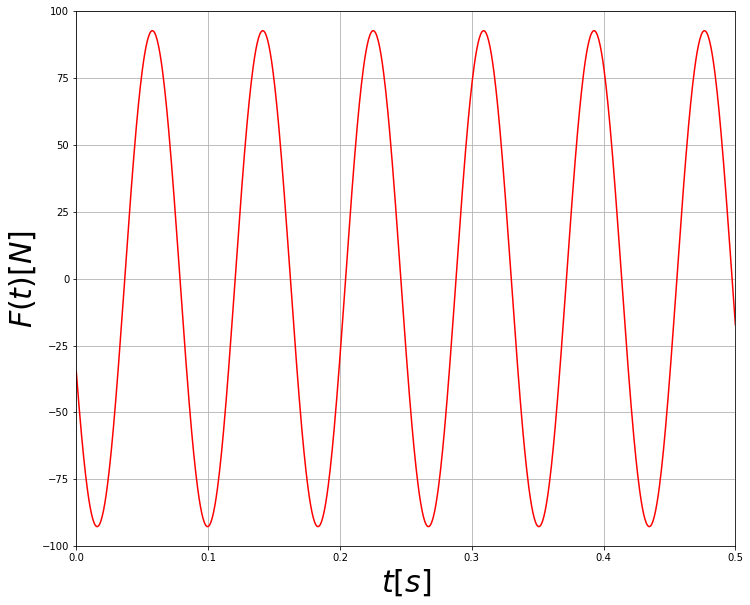

In [14]:
import matplotlib.pyplot as plt

### Ellenőrzésképp érdemes ábrázolni a diamikus erőt
# rajzterület létrehozása    
plt.figure(figsize=(30/2.54,25/2.54))

# függvény kirajzolása az x és y kordináta értékeket tartalmazó listák megadásásval
plt.plot(t_val,F_din_val,color='r',label=r'num_sim')

# tengelyek
axes = plt.gca()
axes.set_xlim([0,t_val[-1]])
axes.set_ylim([-100, 100])

# rácsozás
plt.grid()

# tengelyfeliratozás
plt.xlabel(r'$ t [s] $',fontsize=30)
plt.ylabel(r'$ F(t) [N] $',fontsize=30)

plt.show()

Készítette: 
    Juhos-Kiss Álmos (Alkalmazott Mechanika Szakosztály) 
    Takács Dénes (BME MM) kidolgozása és ábrái alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com
        almosjuhoskiss@gmail.com

            2021.04.04
        